In [277]:
import os
import sys
import pathlib
import subprocess
import glob

root = pathlib.Path("..").resolve()
output_dir = os.path.join(root, "test", "output", "text")

# scientific packages
import xarray as xr
import pandas as pd
import numpy as np
from functools import partial
from itertools import chain, islice
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import troute.nhd_network_utilities_v02 as nnu
import mc_reach
import troute.nhd_network as nhd_network
import troute.nhd_io as nhd_io

In [ ]:
# load domain Route Link

# Load courant and flowveldepth data

# mask RouteLink to only segments for which courant/flowveldepth results are available

# count the total number of courant violations (time/space combos)

# quantify the severity of courant violations


In [234]:
# Load Data
# Route_Link load
geo_file_path = os.path.join(root,"test","input","florence_933020089","DOMAIN","Route_Link.nc")
dat = xr.open_dataset(geo_file_path).to_dataframe()
route_link = dat.set_index("link")

# Courant data
dat = pd.read_csv(os.path.join(output_dir, "courant_Florence_TEST.csv"), index_col=[0]) 
courant = dat.iloc[:,::3]
courant.columns = np.arange(len(courant.columns))

# flow data
dat = pd.read_csv(os.path.join(output_dir, "flowveldepth_Florence_TEST.csv"), index_col=[0]) 
flow = dat.iloc[:,::3]
flow.columns = np.arange(len(courant.columns))

In [227]:
# Count the total number of Courant violations in non reservoir segments
idx = route_link.loc[flow.index].loc[(route_link['NHDWaterbodyComID']==-9999)].index

violate = courant.loc[idx] > 1
n_violations = violate.sum(axis = 1).sum()

print("There are", n_violations, "of", courant.loc[idx].size,"total time/segments that violate the Courant condition, or ", round((n_violations/courant.size)*100,2), "%")

There are 346305 of 9288000 total time/segments that violate the Courant condition, or  3.62 %


In [230]:
print("The maximum Courant number in the simulation domain is", round(courant.loc[idx].max().max(),2))

The maximum Courant number in the simulation domain is 126.81


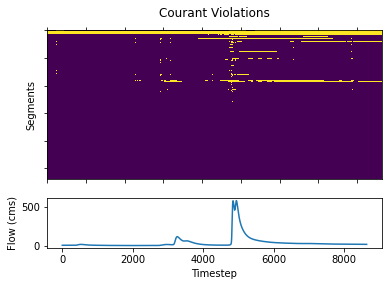

In [313]:
idx = route_link.loc[flow.index].loc[(route_link['NHDWaterbodyComID']==-9999)].sort_values(by = "Length").index


fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

axs[0].matshow(courant.loc[idx], vmin=0.99999, vmax = 1, aspect = "auto", cmap = "viridis")
axs[0].yaxis.set_ticklabels([])
axs[0].xaxis.set_ticklabels([])


axs[1].plot(flow.loc[933020089])

plt.setp(axs[0], ylabel='Segments')
plt.setp(axs[1], ylabel='Flow (cms)')
plt.setp(axs[1], xlabel='Timestep')
plt.setp(axs[0], title='Courant Violations')

plt.show()

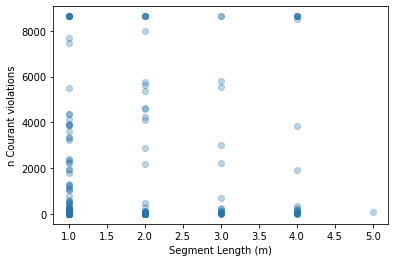

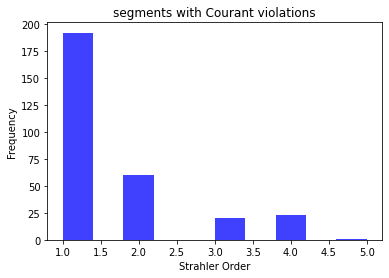

In [335]:
# which segments have the most courant violations?
A = courant > 1
B = A.sum(axis = 1).sort_values(ascending = False).to_frame().join(route_link)

top_10_pct = len(B)

# Plot the number of Courant violations as a function of segment length for NON reservoir segments. 

fig1 = plt.figure()

plt.plot(B.loc[(B['NHDWaterbodyComID']==-9999) & (B[0] > 0)].loc[:,"order"], B.loc[(B['NHDWaterbodyComID']==-9999) & (B[0] > 0)].loc[:,0],'o', alpha = 0.3)
plt.ylabel('n Courant violations')
plt.xlabel('Segment Length (m)')
plt.show()

# B.loc[(B['NHDWaterbodyComID']==-9999) & (B[0] > 0)].loc[:,"Length"].hist()
fig2 = plt.figure()
n, bins, patches = plt.hist(B.loc[(B['NHDWaterbodyComID']==-9999) & (B[0] > 0)].loc[:,"order"], 10, facecolor = 'b', alpha = 0.75)

plt.xlabel('Strahler Order')
plt.ylabel('Frequency')
plt.title('segments with Courant violations')
plt.grid(False)
plt.show()

In [330]:
courant.columns


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639],
           dtype='int64', length=8640)

In [331]:
geo_file_path = os.path.join(root,"test","input","geo","Channels","RouteLink_Florence_FULL_RES_500m_merge.nc")
xr.open_dataset(geo_file_path).to_dataframe()

ValueError: no valid index for a 0-dimensional object